In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
print(len(data))

48204


# Feature Engineering 

In [51]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)

In [94]:
X = data[['month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']

In [95]:
X.head()

,month,weekday,hour,isholiday
0,10,1,9,1.0
1,10,1,10,1.0
2,10,1,11,1.0
3,10,1,12,1.0
4,10,1,13,1.0


### Split dataset

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=49, shuffle=False)

# knn

In [97]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)



KNeighborsRegressor()

In [98]:
y_pred = model.predict(X_test)

In [99]:
print(r2_score(list(y_test), list(y_pred)))

0.9328043369898147


## Visualizing 

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(list(y_test))
plt.plot(list(y_pred))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


In [100]:
knn_grid = GridSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':[2, 4, 6, 8, 10, 12]},
                scoring = 'r2', n_jobs = -1)

knn_grid.fit(X_train, y_train)
print(r2_score(list(y_test), list(knn_grid.predict(X_test))))
print(knn_grid.best_estimator_)


0.9376634945113739
KNeighborsRegressor(n_neighbors=8)


In [101]:

knn_rs = RandomizedSearchCV(KNeighborsRegressor(), 
                 {'n_neighbors':list(range(1, 20))},
                scoring = 'r2', n_iter=10, n_jobs = -1)

knn_rs.fit(X_train, y_train)
print(r2_score(list(y_test), list(knn_rs.predict(X_test))))
print(knn_rs.best_estimator_)

0.9376634945113739
KNeighborsRegressor(n_neighbors=8)


In [81]:
mse = mean_squared_error(list(y_test), list(y_pred))
rmse = sqrt(mse)
rmse

589.6532207867189

# Random Forest

In [102]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [103]:
print(r2_score(list(y_test), list(y_pred1)))

0.9400267156344805


## Grid Search for Random Forest

In [104]:


my_rf = GridSearchCV(RandomForestRegressor(), 
                 {'max_features':[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                 'n_estimators': [10, 50, 100, 250, 500, 750, 1000]},
                scoring = 'r2', n_jobs = -1)

my_rf.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.9400260472173345
{'max_features': 0.8, 'n_estimators': 500}


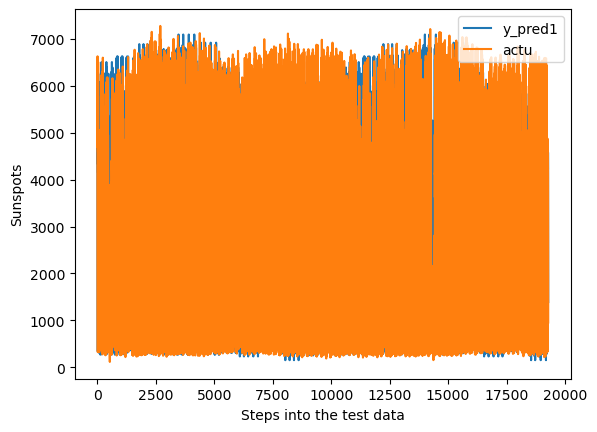

In [86]:
import matplotlib.pyplot as plt
plt.plot(list(y_pred1))
plt.plot(list(y_test))
plt.legend(['y_pred1', 'actu'])
plt.ylabel('Sunspots')
plt.xlabel('Steps into the test data')
plt.show()


In [87]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth =[int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]


params = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
     

In [92]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=params,
                        n_iter=100, cv=10,random_state=42, n_jobs=-1)

In [93]:
rf_randomcv.fit(X_train,y_train)
print(r2_score(list(y_test), list(rf_randomcv.predict(X_test))))
print(rf_randomcv.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packag

KeyError: 'gini'